### Importing the Libraries

In [1]:
import numpy as np  # For using n-d array mathematical operations
import pandas as pd # For open csv files and create dataframe
import matplotlib.pyplot as plt # For plotting graphs

### Reading CSV Files and Checking the content in it

In [2]:
# Opening csv file
dataset = pd.read_csv('startup_funding.csv', skipinitialspace = True, encoding = 'utf-8')
df = dataset.copy() # Copying the dataset dataframe in df in case anything goes wrong, we can start again
df.head(10) # Showing first 10 rows in df

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
5,5,01/07/2017,Billion Loans,Consumer Internet,Peer to Peer Lending platform,Bangalore,Reliance Corporate Advisory Services Ltd,Seed Funding,"1,000,000",NaN
6,6,03/07/2017,Ecolibriumenergy,Technology,Energy management solutions provider,Ahmedabad,"Infuse Ventures, JLL",Private Equity,"2,600,000",NaN
7,7,04/07/2017,Droom,eCommerce,Online marketplace for automobiles,Gurgaon,"Asset Management (Asia) Ltd, Digital Garage Inc",Private Equity,"20,000,000",NaN
8,8,05/07/2017,Jumbotail,eCommerce,online marketplace for food and grocery,Bangalore,"Kalaari Capital, Nexus India Capital Advisors",Private Equity,"8,500,000",NaN
9,9,05/07/2017,Moglix,eCommerce,B2B marketplace for Industrial products,Noida,"International Finance Corporation, Rocketship,...",Private Equity,"12,000,000",NaN


### Solution for given problem
To find out top 5 investors who funded most in Seed Funding and CrowdFunding, we can use InvestorsName, StartupName and InvestmentType column in the dataset and count the fundings for each investor.

Indian Angel Network 33
Undisclosed Investors 28
Rajan Anandan 24
Undisclosed investors 24
LetsVenture 16


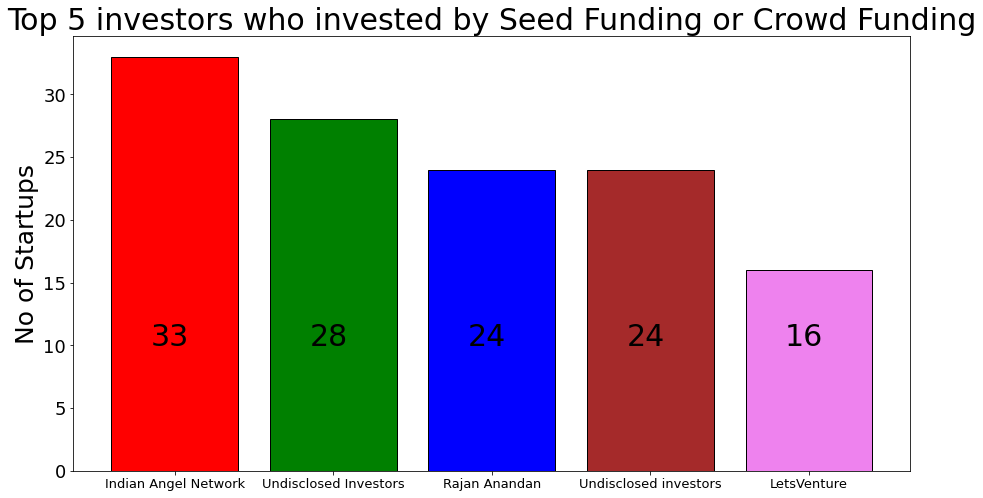

In [3]:
# Correcting incorrect values in InvestmentType column
df.InvestmentType.replace('PrivateEquity', 'Private Equity', inplace = True)
df.InvestmentType.replace('SeedFunding', 'Seed Funding', inplace = True)
df.InvestmentType.replace('Crowd funding', 'Crowd Funding', inplace = True)
df.InvestmentType.fillna('', inplace = True)

# Replacing nan values in columns
df.InvestorsName.fillna('', inplace = True)
df.StartupName.fillna('', inplace = True)

# Fetching Investors and Startups who have invested using Seed Funding and Crowd Funding.
allInvestors = df.InvestorsName[(df.InvestmentType == 'Seed Funding')|(df.InvestmentType == 'Crowd Funding')]
startupNames = df.StartupName[(df.InvestmentType == 'Seed Funding')|(df.InvestmentType == 'Crowd Funding')]
investorsWithCount = {} # Creating a dictionary with investors as key and no of companies invested as values
investorsWithStartups = {} # Creating a dictionary with investors as key and all the complanies as values
allInvestors = np.array(allInvestors)
startupNames = np.array(startupNames)

# Fetching investors with startups and count
for index in range(len(allInvestors)):
    investorName = allInvestors[index].split(', ')
    startupName = startupNames[index]
    if investorName == '' and startupName == '':
        continue
    for investors in investorName:
        investor = investors.split(' and ')
        for invest in investor:
            inv = invest.split(',')
            for name in inv:
                if name == '':
                    continue
                if name[-1] == ' ':
                    name = name[:-1]
                if name[0] == ' ':
                    name = name[1:]
                if investorsWithStartups.get(name,None) is None:
                    investorsWithStartups[name] = [startupName]
                    investorsWithCount[name] = 1
                else:
                    investorsWithStartups[name].append(startupName)
                    investorsWithCount[name] += 1

# Fetching investors and count
investors = list(investorsWithCount.keys())
count = list(investorsWithCount.values())
investorsWithCount = list(zip(investors,count)) # Converting it into 2D Array
investorsWithCount.sort(reverse = True, key = lambda x:x[1]) # Sorting the array in descending order
investorsWithCount = np.array(investorsWithCount)
investors = investorsWithCount[:,0]
count = np.array(investorsWithCount[:,1], dtype = int)

# Printing top 5 investors
for index in range(5):
    print(investors[index], count[index])
    
# Plotting the bar graph
plt.figure(figsize = (15,8))
plt.bar(investors[:5], height = count[:5], 
        color = ['red', 'green', 'blue', 'brown', 'violet'], edgecolor = 'black')
plt.ylabel('No of Startups', fontsize = 25)
plt.yticks(np.arange(0,35,5), fontsize = 18)
plt.xticks(fontsize = 13)
for index in range(5):
    plt.text(index-0.15,10,count[index],fontsize = 30)
plt.title('Top 5 investors who invested by Seed Funding or Crowd Funding', fontsize = 30)
plt.show()